
1) Заданы две функции 𝑥 = 𝑠𝑖𝑛(4.1𝜋𝑡) и 𝑦 = cos(2.2𝜋𝑡) ,𝑡 задано в 1000
точек на отрезке [0,1]. Визуализировать эту параметрическую кривую
средствами matplotlib, аппроксимировать её с помощью полиномов
степеней от 5 до 19. Визуализировать и объяснить результаты.
Построить зависимость погрешности аппроксимации от степени
полинома.

2) Построить матрицу с 100 строками и пятью столбцами, заполненную
случайными числами, распределенными равномерно на отрезке [-1, 1].
Выполните сингулярное разложение сформированной матрицы. После
этого выполните восстановление матрицы принудительно приравнивая
нулю 1,2,3,4 минимальных сингулярных числа. Для каждого случая
вычислите погрешность восстановления (максимум абсолютного
значения разности элементов исходной и восстановленной матрицы).
Постройте зависимость погрешности от числа зануляемых сингулярных
чисел.

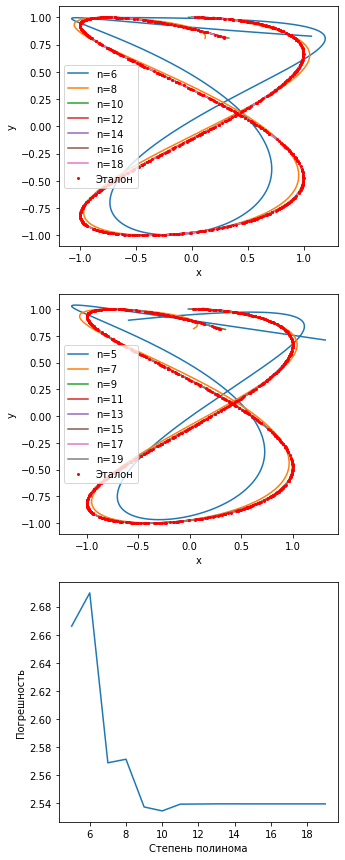

In [27]:
from numpy.polynomial.polynomial import polyval
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la


def pol_model(t, y, n):
    m = len(t)
    A = np.zeros((m, n+1))
    for i in range(m):
        for j in range(n+1):
            A[i, j] = t[i]**j
    r = la.lstsq(A, y, rcond=-1)
    return r[0]

func1 = lambda t: np.sin(4.1*t*np.pi)
func2 = lambda t: np.cos(2.2*t*np.pi)


t = np.random.uniform(0, 1, 1000)
x = func1(t)
y = func2(t)


ns = range(5, 20)
errs = np.zeros(len(ns))
x1 = np.linspace(0, 1, 1000)
fig = plt.figure(figsize=(5, 15))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
for i in range(len(ns)):
    a1 = pol_model(t, x, ns[i])
    xx = polyval(x1, a1)
    a2 = pol_model(t, y, ns[i])
    yy = polyval(x1, a2)
    if ns[i]%2 == 0:
        ax1.plot(xx, yy, label=f'n={ns[i]}')
    else:
        ax2.plot(xx, yy, label=f'n={ns[i]}')
    err = max(np.sqrt((x-xx)**2 + (y-yy)**2))
    errs[i] = err

ax3.plot(ns, errs)
ax3.set_xlabel('Степень полинома')
ax3.set_ylabel('Погрешность')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax1.plot(x, y, 'ro', ms=2, label='Эталон')
ax2.plot(x, y, 'ro', ms=2, label='Эталон')
ax1.legend()
ax2.legend()
plt.show()

## Задание 2

Построить матрицу с 100 строками и пятью столбцами, заполненную
случайными числами, распределенными равномерно на отрезке [-1, 1].
Выполните сингулярное разложение сформированной матрицы. После
этого выполните восстановление матрицы принудительно приравнивая
нулю 1,2,3,4 минимальных сингулярных числа. Для каждого случая
вычислите погрешность восстановления (максимум абсолютного
значения разности элементов исходной и восстановленной матрицы).
Постройте зависимость погрешности от числа зануляемых сингулярных
чисел.

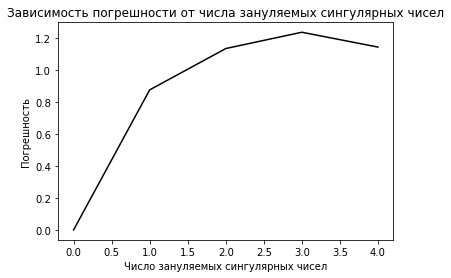

In [33]:
def gen_matrix(m, n, a, b):
    return np.random.uniform(a, b, (m, n))


def restore(U, s, VT):
    Sigma = np.zeros((U.shape[0], VT.shape[0]))
    for i in range(min((U.shape[0], VT.shape[0]))):
        Sigma[i, i] = s[i]
    return U @ Sigma @ VT


matrix = gen_matrix(100, 5, -1, 1)
U, s, VT = la.svd(matrix)
z_s = [0, 1, 2, 3, 4]
errs = np.zeros(len(z_s))
for i in z_s:
    ss = s if i == 0 else np.concatenate((s[:-i], np.zeros(i)))
    rest = restore(U, ss, VT)
    errs[i] = np.max(np.abs(rest - matrix))
plt.plot(z_s, errs, color='black')
plt.title('Зависимость погрешности от числа зануляемых сингулярных чисел')
plt.xlabel('Число зануляемых сингулярных чисел')
plt.ylabel('Погрешность')
plt.show()